In [1]:
import sys
sys.path.insert(0, '/home/emmanuel/code/kernellib')
sys.path.insert(0, '/home/emmanuel/code/py_esdc')
sys.path.insert(0, '/home/emmanuel/projects/2019_sakame/src/')

# from showprogress import showprogress
import xarray as xr
import numpy as np
import pandas as pd
import h5py

from data.make_dataset import ESDCData
from models.esdc_sampling import SamplingModel
from models.derivatives import GPRBFDerivative
from py_esdc.data import window_xy, get_xy_indices, get_3dgrid
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import cartopy
import cartopy.crs as ccrs
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
figures_path = '/home/emmanuel/projects/2019_sakame/reports/figures/sampling/'
data_xr_path = '/home/emmanuel/projects/2019_sakame/data/results/sampling/'

variables = [

#     'land_surface_temperature',
#     'gross_primary_productivity',
#     'air_temperature_2m',
#     'precipitation',
#     'evaporation',
#     'soil_moisture',
#     'surface_moisture',
]
window_sizes = [2, 3, 4, 5, 6, 7] #, 8, 9 , 10]
variable = 'gross_primary_productivity'

In [3]:
with xr.open_dataset(data_xr_path + f"sampling_{variable}.nc") as xr_data:
    pass

## Gross Primary Productivity

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


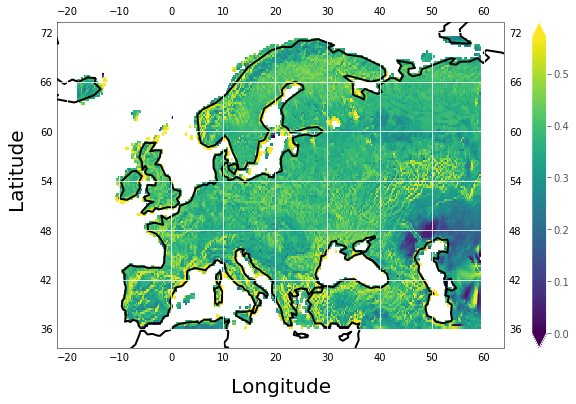

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


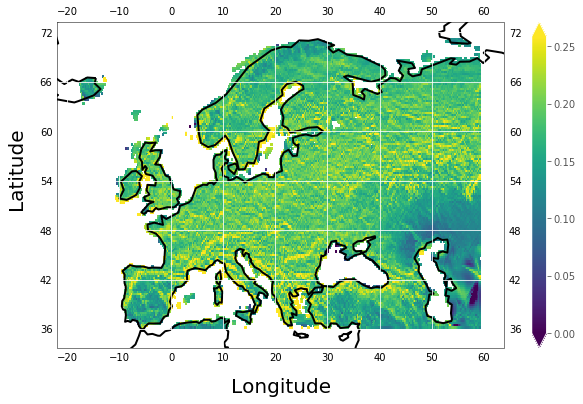

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


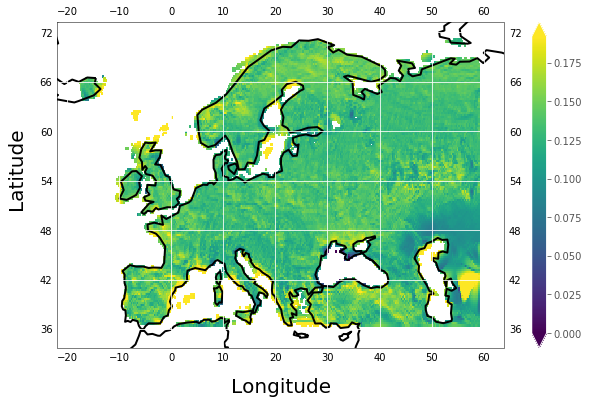

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


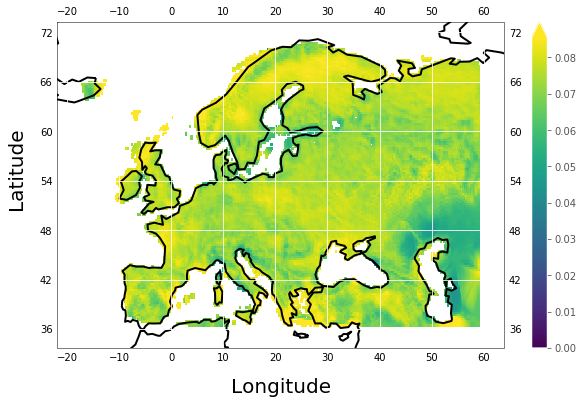

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


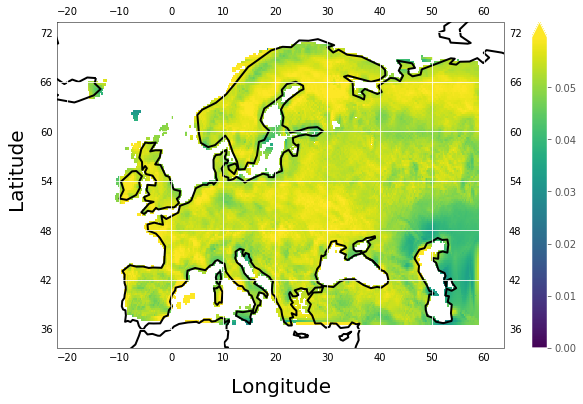

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


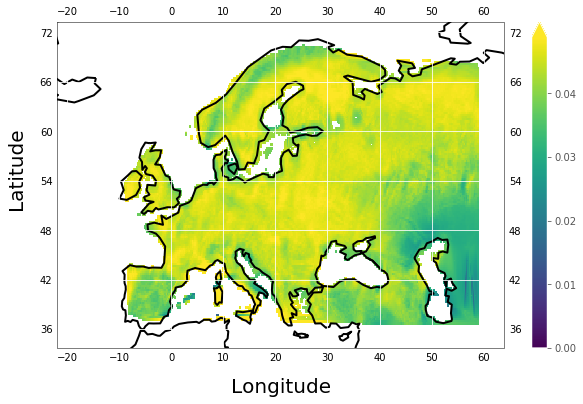

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


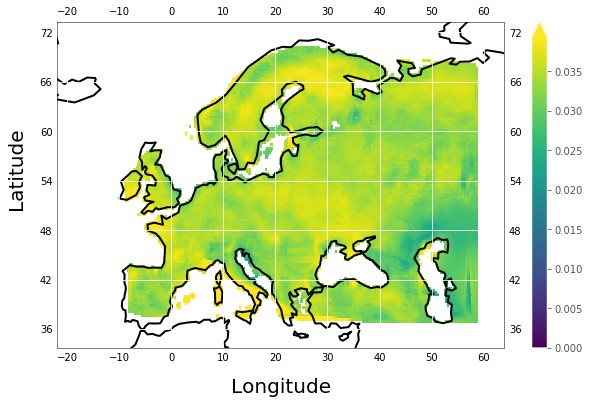

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


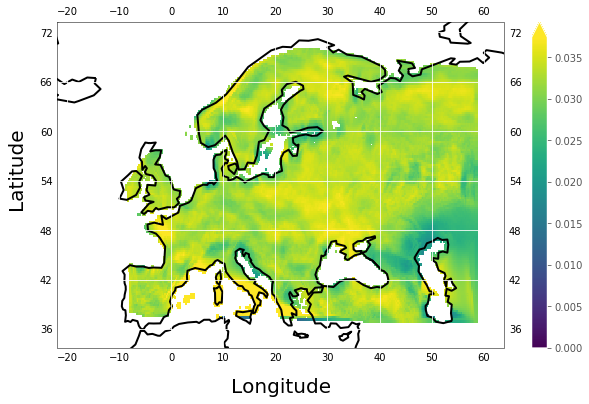

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


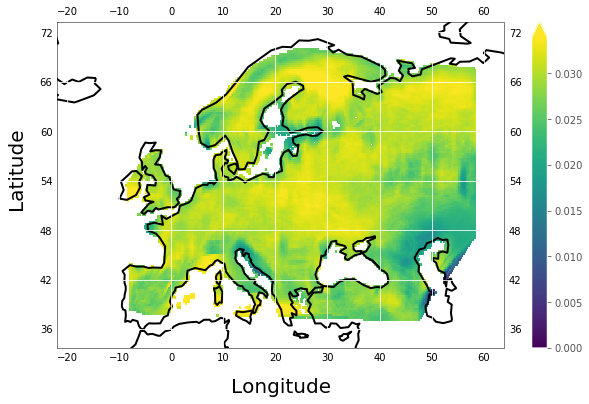

In [5]:
figures_path = '/home/emmanuel/projects/2019_sakame/reports/figures/sampling/'
variable='gross_primary_productivity'
with xr.open_dataset(data_xr_path + f"sampling_{variable}.nc") as xr_data:
    # select data subset
    for iwindow in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
        subset = xr_data.sensitivity.sel(window=iwindow).mean(dim='time', skipna=True).where(xr_data.mask == 1)


        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection=ccrs.PlateCarree(), aspect='auto')

        p = subset.plot.pcolormesh(
            ax=ax, transform=ccrs.PlateCarree(),
            robust=True, 
            cmap='viridis', vmin=0,
    #             cbar_kwargs={'label': subset.gross_primary_productivity.units, 
    #                          'format': '%.1f'}
        )
    #     cbar = fig.colorbar(p)
        ax.set_title('')
        ax.coastlines(linewidth=2)
        ax.gridlines(draw_labels=True)
        ax.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
                rotation='vertical', rotation_mode='anchor', fontsize=20,
                transform=ax.transAxes)
        ax.text(0.5, -0.15, 'Longitude', va='bottom', ha='center',
                rotation='horizontal', rotation_mode='anchor', fontsize=20,
                transform=ax.transAxes)
        plt.tight_layout()
        save_plt_name = f'gpp_sens_{iwindow}'
        plt.savefig(figures_path + save_plt_name + '.png', transparent=True)
        plt.show()

In [18]:
variable = 'gross_primary_productivity'
gpp_df = pd.read_csv(data_xr_path + f'sampling_{variable}.csv')

df = gpp_df.groupby(['window'], as_index=False).mean()


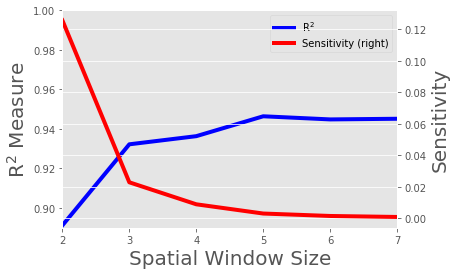

In [19]:
# Plot
fig, ax = plt.subplots()

df.plot(
    ax=ax,
    x='window',
    y=['r2'],
    label=[r'R$^2$'],
    linewidth=4,
    color='blue'
)

df.plot(
    ax=ax,
    x='window',
    y=['sens'],
    secondary_y=True,
    label=['Sensitivity'],
    linewidth=4,
    color='red'
)



ax.set_xlabel('Spatial Window Size', fontsize=20)
ax.set_ylabel(r'R$^2$ Measure', fontsize=20)
ax.right_ax.set_ylabel('Sensitivity', fontsize=20)
# ax.legend(loc='center right')
ax.set_xlim([2, 7])
ax.set_ylim([0.89, 1.0])

plt.savefig(figures_path + 'gpp_summary' + '.png', transparent=True)
plt.show()

## Land Surface Temperature

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


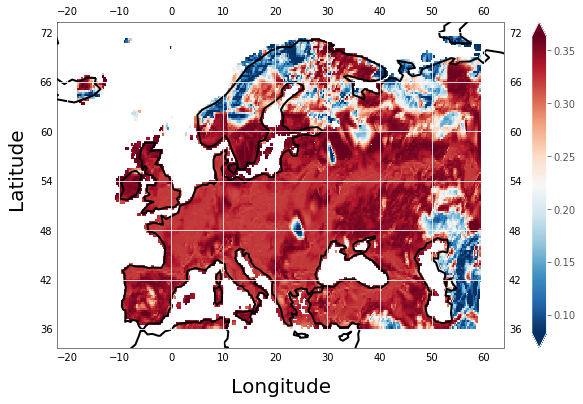

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


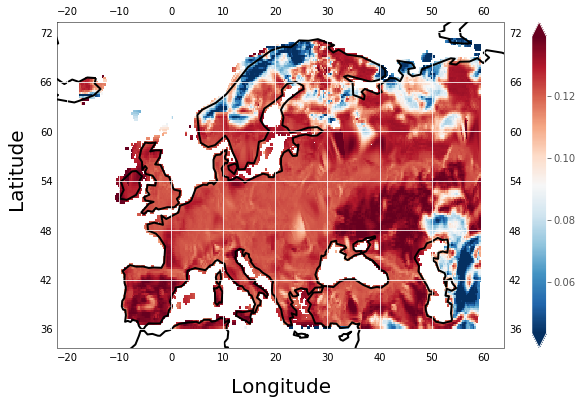

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


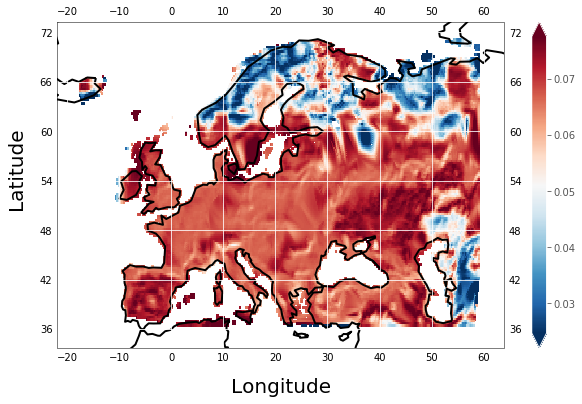

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


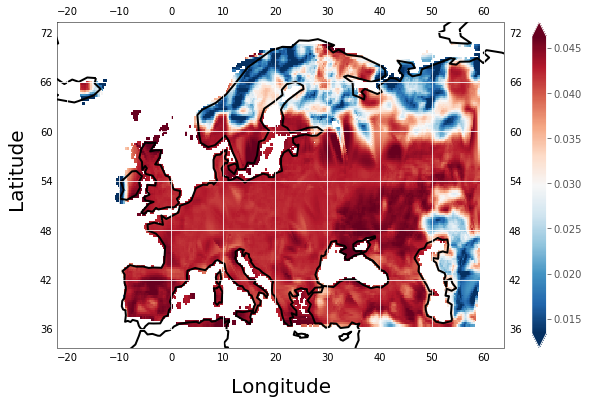

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


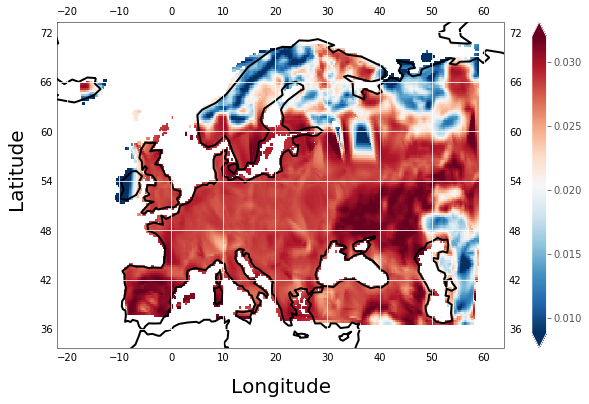

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


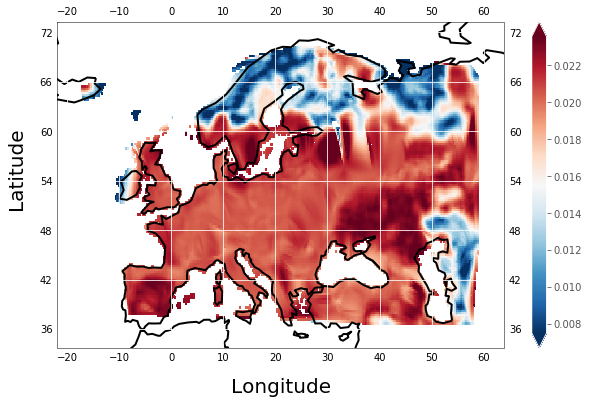

In [87]:
figures_path = '/home/emmanuel/projects/2019_sakame/reports/figures/sampling/'
variable = 'land_surface_temperature'
with xr.open_dataset(data_xr_path + f"sampling_{variable}.nc") as xr_data:
    # select data subset
    for iwindow in [2, 3, 4, 5, 6, 7]:
#         subset = xr_data.sensitivity.sel(window=iwindow).mean(dim='time').where(xr_data.mask == 1)
        subset = xr_data.sensitivity.sel(window=iwindow).isel(time=0).where(xr_data.mask == 1)


        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection=ccrs.PlateCarree(), aspect='auto')

        p = subset.plot.pcolormesh(
            ax=ax, transform=ccrs.PlateCarree(),
            robust=True, 
            cmap='RdBu_r', 
    #             cbar_kwargs={'label': subset.gross_primary_productivity.units, 
    #                          'format': '%.1f'}
        )
    #     cbar = fig.colorbar(p)
        ax.set_title('')
        ax.coastlines(linewidth=2)
        ax.gridlines(draw_labels=True)
        ax.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
                rotation='vertical', rotation_mode='anchor', fontsize=20,
                transform=ax.transAxes)
        ax.text(0.5, -0.15, 'Longitude', va='bottom', ha='center',
                rotation='horizontal', rotation_mode='anchor', fontsize=20,
                transform=ax.transAxes)
        plt.tight_layout()
        save_plt_name = f'lst_sens_{iwindow}'
        plt.savefig(figures_path + save_plt_name + '.png', transparent=True)
        plt.show()

In [20]:

variable = 'land_surface_temperature'
lst_df = pd.read_csv(data_xr_path + f'sampling_{variable}.csv')

# lst_df

In [21]:
df = lst_df.groupby(['window'], as_index=False).mean()
df

,window,Unnamed: 0,mae,mse,r2,rmse,sens
0,2.0,5,1.591224,5.850339,0.953453,2.401914,0.102762
1,3.0,16,1.231922,3.590764,0.972382,1.877778,0.014867
2,4.0,27,1.353659,4.278468,0.967495,2.044161,0.004345
3,5.0,38,1.490595,5.051169,0.960015,2.225505,0.001630
4,6.0,49,1.529701,5.305228,0.957100,2.282473,0.000766
5,7.0,60,1.598900,5.658781,0.954454,2.358698,0.000407


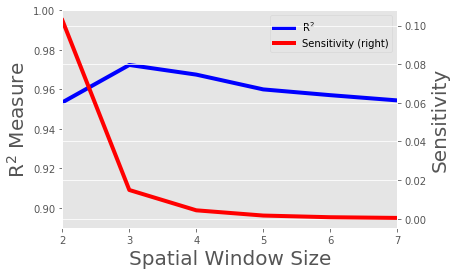

In [23]:
# Plot
fig, ax = plt.subplots()

df.plot(
    ax=ax,
    x='window',
    y=['r2'],
    label=[r'R$^2$'],
    linewidth=4,
    color='blue'
)

df.plot(
    ax=ax,
    x='window',
    y=['sens'],
    secondary_y=True,
    label=['Sensitivity'],
    linewidth=4,
    color='red'
)


ax.set_xlabel('Spatial Window Size', fontsize=20)
ax.set_ylabel(r'R$^2$ Measure', fontsize=20)
ax.right_ax.set_ylabel('Sensitivity', fontsize=20)
ax.set_xlim([2, 7])
ax.set_ylim([0.89, 1.0])

plt.savefig(figures_path + 'lst_summary.png', transparent=True)
plt.show()

## Air Temperature 2m

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


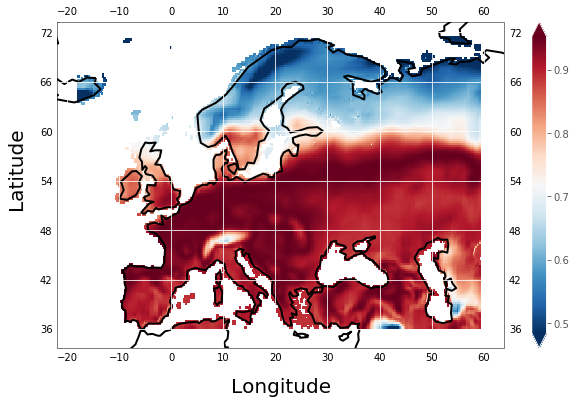

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


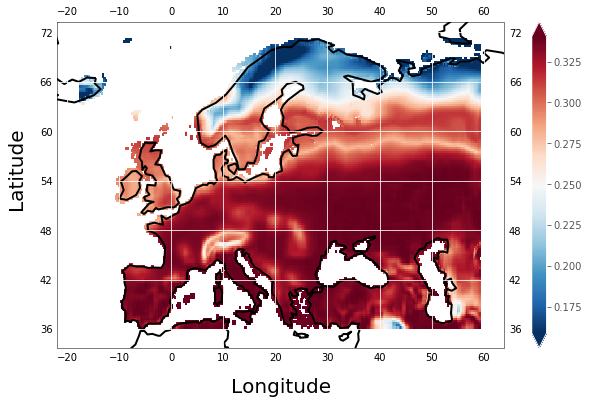

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


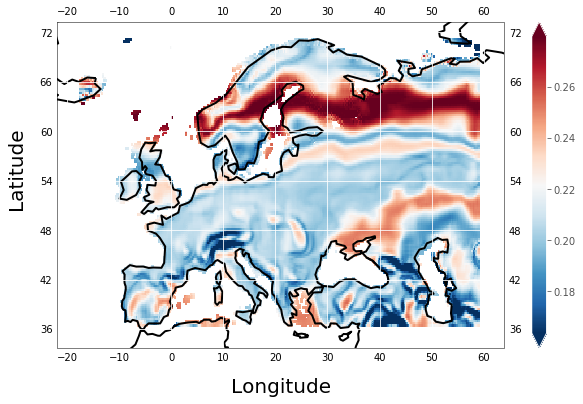

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


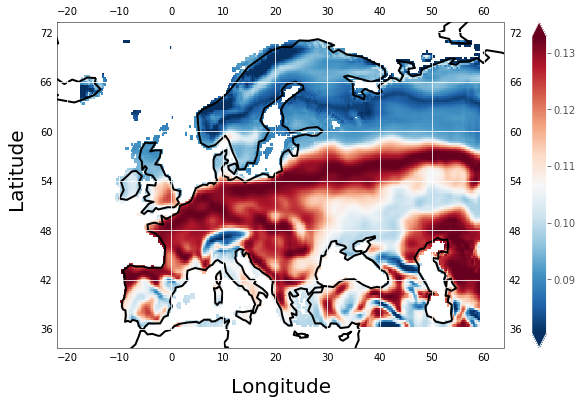

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


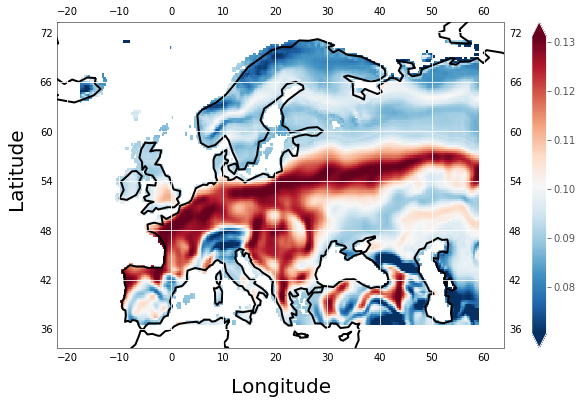

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


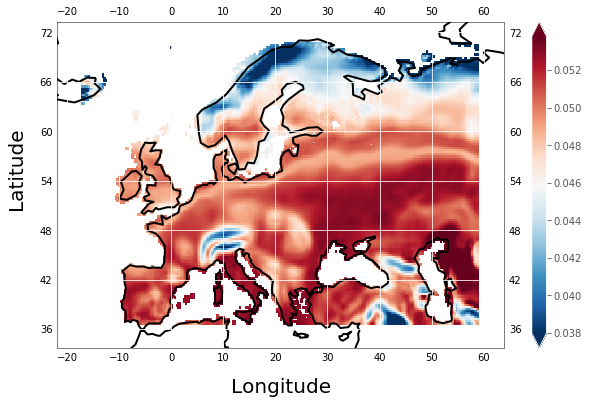

In [88]:
figures_path = '/home/emmanuel/projects/2019_sakame/reports/figures/sampling/'
variable = 'air_temperature_2m'
with xr.open_dataset(data_xr_path + f"sampling_{variable}.nc") as xr_data:
    # select data subset
    for iwindow in [2, 3, 4, 5, 6, 7]:
#         subset = xr_data.sensitivity.sel(window=iwindow).mean(dim='time').where(xr_data.mask == 1)
        subset = xr_data.sensitivity.sel(window=iwindow).isel(time=0).where(xr_data.mask == 1)


        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection=ccrs.PlateCarree(), aspect='auto')

        p = subset.plot.pcolormesh(
            ax=ax, transform=ccrs.PlateCarree(),
            robust=True, 
            cmap='RdBu_r', 
    #             cbar_kwargs={'label': subset.gross_primary_productivity.units, 
    #                          'format': '%.1f'}
        )
    #     cbar = fig.colorbar(p)
        ax.set_title('')
        ax.coastlines(linewidth=2)
        ax.gridlines(draw_labels=True)
        ax.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
                rotation='vertical', rotation_mode='anchor', fontsize=20,
                transform=ax.transAxes)
        ax.text(0.5, -0.15, 'Longitude', va='bottom', ha='center',
                rotation='horizontal', rotation_mode='anchor', fontsize=20,
                transform=ax.transAxes)
        plt.tight_layout()
        save_plt_name = f'air_sens_{iwindow}'
        plt.savefig(figures_path + save_plt_name + '.png', transparent=True)
        plt.show()

In [89]:

variable = 'air_temperature_2m'
air_df = pd.read_csv(data_xr_path + f'sampling_{variable}.csv')

# lst_df

In [90]:
df = air_df.groupby(['window'], as_index=False).mean()
df

,window,Unnamed: 0,mae,mse,r2,rmse,sens
0,2.0,5,0.057557,0.025356,0.999425,0.155531,0.272424
1,3.0,16,0.030497,0.012016,0.999722,0.105179,0.038111
2,4.0,27,0.047011,0.059441,0.998596,0.210586,0.014397
3,5.0,38,0.046094,0.028961,0.999311,0.159290,0.004499
4,6.0,49,0.054065,0.049218,0.998829,0.212580,0.002770
5,7.0,60,0.045946,0.019090,0.999532,0.135189,0.001032
6,8.0,71,0.049856,0.017764,0.999559,0.131987,0.000671
7,9.0,82,0.055576,0.021474,0.999459,0.145074,0.000412
8,10.0,93,0.059463,0.038072,0.999030,0.181960,0.000275


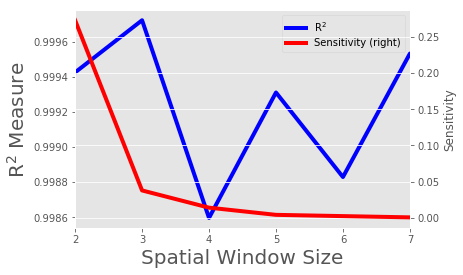

In [91]:
# Plot
fig, ax = plt.subplots()

df.plot(
    ax=ax,
    x='window',
    y=['r2'],
    label=[r'R$^2$'],
    linewidth=4,
    color='blue'
)

df.plot(
    ax=ax,
    x='window',
    y=['sens'],
    secondary_y=True,
    label=['Sensitivity'],
    linewidth=4,
    color='red'
)


ax.set_xlabel('Spatial Window Size', fontsize=20)
ax.set_ylabel(r'R$^2$ Measure', fontsize=20)
ax.right_ax.set_ylabel('Sensitivity')
ax.set_xlim([2, 7])
plt.savefig(figures_path + 'lst_summary.png', transparent=True)
plt.show()